**Contexte :**

Les institutions financières doivent **évaluer le risque de défaut de paiement des prêts**.
Des prévisions précises peuvent aider à prendre des décisions éclairées en matière de prêt.
L'apprentissage automatique permet d'analyser les données historiques afin de prévoir les défauts de paiement.

**Objectif:**
- Construire un modèle permettant de prévoir si un prêt fera l'objet d'un défaut de paiement en fonction des données fournies par le demandeur.
- Identifier les facteurs les plus importants contribuant aux défauts de paiement.
- Fournir des recommandations pour atténuer les risques.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Partie :  Exploratoire du jeu de données

In [39]:
# lecture du jeu de données
df = pd.read_csv("loan_default_data.csv")
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.shape

(255347, 18)

In [4]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

### Statistique descriptive sur les variables numériques

In [5]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
df[df["Age"]>=69]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
39,5FENBP2UV8,69,87295,16281,707,94,1,13.82,60,0.75,Bachelor's,Part-time,Single,No,No,Other,No,0
160,AK528U4ZW4,69,126838,221077,818,35,2,23.15,36,0.37,High School,Self-employed,Single,Yes,Yes,Business,No,0
195,F74TVB524O,69,19459,29148,726,31,4,5.27,24,0.66,High School,Unemployed,Married,Yes,Yes,Other,No,0
215,NJEZ1ZGWB3,69,86549,135912,721,114,3,2.77,36,0.52,PhD,Part-time,Divorced,No,Yes,Business,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254981,CCW7P8AGV2,69,46444,125119,804,27,1,12.50,36,0.59,Bachelor's,Self-employed,Single,No,Yes,Auto,Yes,0
255081,F3GSMAZVES,69,125748,208731,464,76,1,13.05,48,0.71,PhD,Full-time,Married,Yes,Yes,Other,No,0
255192,HSV4TBJNW0,69,102466,172764,562,11,4,15.93,48,0.88,PhD,Part-time,Married,Yes,No,Business,Yes,0
255312,1BYA5HN05I,69,109352,129234,767,56,4,11.76,36,0.39,Bachelor's,Unemployed,Married,Yes,Yes,Home,Yes,0


### Statistique sur les variables catégorielles

In [7]:
# statistique descriptive sur les variables de type catégorielles
df.describe(include=object)

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,ZTH91CGL0B,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [8]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("Variables catégorielles :", list(cat_cols))

Variables catégorielles : ['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


In [9]:
for col in cat_cols:
    print(f"\n{col} :")
    print(df[col].unique())


LoanID :
['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']

Education :
["Bachelor's" "Master's" 'High School' 'PhD']

EmploymentType :
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

MaritalStatus :
['Divorced' 'Married' 'Single']

HasMortgage :
['Yes' 'No']

HasDependents :
['Yes' 'No']

LoanPurpose :
['Other' 'Auto' 'Business' 'Home' 'Education']

HasCoSigner :
['Yes' 'No']


Chaque variable catégorielle présente des valeurs uniques correctes.

### Gestion de valeurs manquantes

In [10]:
# Valeur Manquante
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### Est-ce que les données sont équilibrées ?

In [11]:
# Comptage des classes
print(df["Default"].value_counts())

# Pourcentage de chaque classe
print(df["Default"].value_counts(normalize=True) * 100)

Default
0    225694
1     29653
Name: count, dtype: int64
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


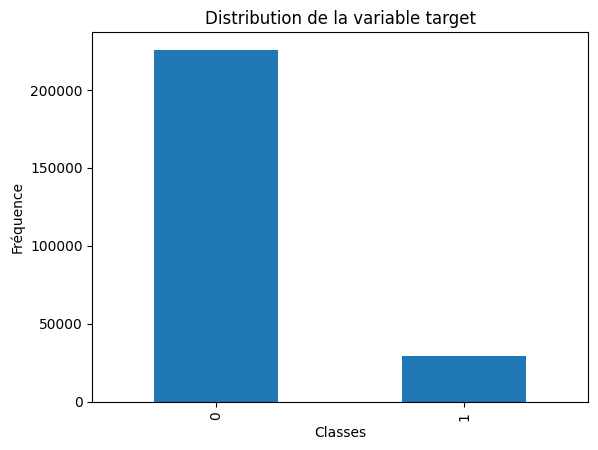

In [12]:
# Vérifier si le dataset est équilibré
# Connaitre la répartition des données en fonction de la target

# Si target est catégorielle
df["Default"].value_counts().plot(kind="bar")
plt.title("Distribution de la variable target")
plt.xlabel("Classes")
plt.ylabel("Fréquence")
plt.show()

Le jeu de données est déséquilibré, car il y'a plus de 0 que de 1. La classe 1 est très minoritaire par rapport à la classe 0. Cela risque de ne pas généraliser.

### Encodage des variables catégorielles

In [40]:
# Variables catégorielle Yes or No en 1 et 0
cols_yes_no = df.columns[df.isin(["Yes", "No"]).any()]
for col in cols_yes_no:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [35]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [41]:
# 1. Encodage Ordinal pour Education
education_order = [["High School", "Bachelor's", "Master's", "PhD"]]
ord_enc = OrdinalEncoder(categories=education_order)
df["Education"] = ord_enc.fit_transform(df[["Education"]])

In [43]:
# 2. One-Hot Encoding pour EmploymentType, MaritalStatus et LoanPurpose

onehot_enc = OneHotEncoder(drop="first", sparse_output=False)

onehot_vars = ["EmploymentType", "MaritalStatus", "LoanPurpose"]

onehot_encoded = onehot_enc.fit_transform(df[onehot_vars])

# Transformer en DataFrame
onehot_df = pd.DataFrame(
    onehot_encoded,
    columns=onehot_enc.get_feature_names_out(onehot_vars)
)

In [44]:
# Fusion
df_final = pd.concat([df.drop(columns=onehot_vars), onehot_df], axis=1)

In [45]:
df_final.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,Default,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_final.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       'Default', 'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [53]:
df_final = df_final.drop("LoanID", axis=1)

In [54]:
df_final.dtypes

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
Education                       float64
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
Default                           int64
EmploymentType_Part-time        float64
EmploymentType_Self-employed    float64
EmploymentType_Unemployed       float64
MaritalStatus_Married           float64
MaritalStatus_Single            float64
LoanPurpose_Business            float64
LoanPurpose_Education           float64
LoanPurpose_Home                float64
LoanPurpose_Other               float64
dtype: object

### Equilibre du jeu de données

In [55]:
X = df_final.drop(columns=['Default'])
y = df_final['Default'].astype(int)

In [56]:
X.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,69,50432,124440,458,15,1,4.81,60,0.68,2.0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


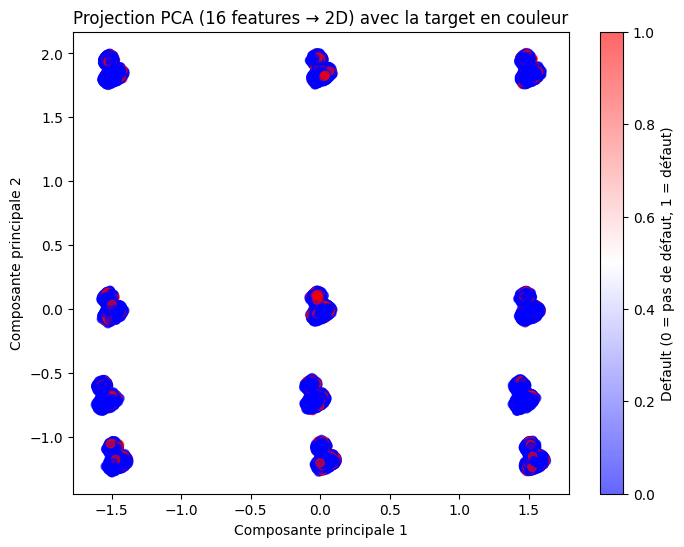

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardiser les données (important pour PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4Visualiser en scatter plot avec target en couleur
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="bwr", alpha=0.6)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Projection PCA (16 features → 2D) avec la target en couleur")
plt.colorbar(label="Default (0 = pas de défaut, 1 = défaut)")
plt.show()

#### Réduction de la classe majoritaire

In [57]:
# ECHANTILLONNAGE ALEATOIRE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print("Avant rééchantillonnage :", y.value_counts())
print("Après rééchantillonnage :", y_res.value_counts())


Avant rééchantillonnage : Default
0    225694
1     29653
Name: count, dtype: int64
Après rééchantillonnage : Default
0    29653
1    29653
Name: count, dtype: int64


#### Tomek Link

Suppression des points de la classe majoritaire proche des points de la classe minoritaire

In [58]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tom, y_tom = tl.fit_resample(X, y)

print("Avant Tomek Links :", y.value_counts())
print("Après Tomek Links :", y_tom.value_counts())

Avant Tomek Links : Default
0    225694
1     29653
Name: count, dtype: int64
Après Tomek Links : Default
0    210636
1     29653
Name: count, dtype: int64


On constate que le jeu de données demeurent encore déséquilibré. l'hypothèse serait vu l'étendu des caractéristques, les données de la classe minoritaire sont très eparpillées de celles de la classe majoritaire. D'où l'agorithme n'a pas pu selectionner et supprimer les plus proches voisins des points de la classe minoritaire.

In [ ]:
# SMOTE

## Partie 2 :  Construction du modèle

### CART: Arbre de décision

In [ ]:

from sklearn.tree import DecisionTreeClassifier
# Initialisation du modèle
model = DecisionTreeClassifier(max_depth=3, random_state=42)